In [128]:
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt
from tqdm import tqdm

In [171]:
chars = np.array([ord("Z")-ord(i) for i in input().upper()])
print(chars)

abcd
[25 24 23 22]


In [66]:
dataset = np.array([np.arange(i,i+4)%26 for i in range(26)])
print(dataset)

[[ 0  1  2  3]
 [ 1  2  3  4]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [ 4  5  6  7]
 [ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]
 [ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]
 [12 13 14 15]
 [13 14 15 16]
 [14 15 16 17]
 [15 16 17 18]
 [16 17 18 19]
 [17 18 19 20]
 [18 19 20 21]
 [19 20 21 22]
 [20 21 22 23]
 [21 22 23 24]
 [22 23 24 25]
 [23 24 25  0]
 [24 25  0  1]
 [25  0  1  2]]


In [68]:
def angle_encoding(qc,arr):
    angles = 2*np.arcsin(np.sqrt(arr/25))
    for i in range(len(arr)):
        qc.ry(angles[i],i)

In [100]:
def add_encoder(qc,n):
    parameters = [Parameter(f'theta_{i}') for i in range(n*5)]
    for i in range(n):
        qc.rz(parameters[i],i)
    idx = n
    for i in range(n):
        for j in range(n):
            if i==j:
                continue
            else:
                qc.crz(parameters[idx],i,j)
                idx += 1
    for i in range(n):
        qc.rz(parameters[4*n+i],i)
    return parameters

In [144]:
def compute_cost(parameters, data):
    qc = QuantumCircuit(7,1)
    qc.initialize(data/np.sqrt(np.sum(data**2)),(4,5))
    angle_encoding(qc,data)
    params = add_encoder(qc,len(data))
    qc.h(6)
    qc.cswap(6,4,2)
    qc.cswap(6,5,3)
    qc.h(6)
    qc.measure(6,0)
    qc = qc.bind_parameters({params[i]:random_params[i] for i in range(5*n)})
    backend = Aer.get_backend('aer_simulator')
    circ = transpile(qc, backend)
    count = backend.run(circ).result().get_counts()
    return np.log10(1-(count['0']/1024))

In [178]:
epochs = 50
initial_params = np.random.rand(5*n)*2*np.pi
params = initial_params
alpha = 0.002
costs = []
s = 1e-4
#training autoencoder
for epoch in tqdm(range(epochs),desc="Training autoencoder..."):
    np.random.shuffle(dataset)
    cost = 0
    left = 0
    right = 0
    for data in dataset:
        cost += abs(compute_cost(params, data))
        left += compute_cost(params+s, data)
        right += compute_cost(params-s, data)
    costs.append(cost/len(dataset))
    gradient = (left-right)/(2*s*n)
    params -= alpha*gradient
    print(f"MAE Cost After Epoch {epoch+1}: ",costs[-1])

Training autoencoder...:   2%|▍                  | 1/50 [00:28<23:06, 28.30s/it]

MAE Cost After Epoch 1:  0.43387963094856313


Training autoencoder...:   4%|▊                  | 2/50 [01:05<26:49, 33.52s/it]

MAE Cost After Epoch 2:  0.4371589033806215


Training autoencoder...:   6%|█▏                 | 3/50 [01:43<27:50, 35.54s/it]

MAE Cost After Epoch 3:  0.4361510290355748


Training autoencoder...:   8%|█▌                 | 4/50 [02:19<27:24, 35.74s/it]

MAE Cost After Epoch 4:  0.42988764577361044


Training autoencoder...:  10%|█▉                 | 5/50 [02:59<28:02, 37.38s/it]

MAE Cost After Epoch 5:  0.440264371998946


Training autoencoder...:  12%|██▎                | 6/50 [03:55<32:00, 43.64s/it]

MAE Cost After Epoch 6:  0.43502711558674406


Training autoencoder...:  14%|██▋                | 7/50 [04:32<29:45, 41.53s/it]

MAE Cost After Epoch 7:  0.43274261498528666


Training autoencoder...:  16%|███                | 8/50 [05:03<26:43, 38.19s/it]

MAE Cost After Epoch 8:  0.4355301897101081


Training autoencoder...:  18%|███▍               | 9/50 [05:52<28:20, 41.49s/it]

MAE Cost After Epoch 9:  0.4330577809673239


Training autoencoder...:  20%|███▌              | 10/50 [06:44<29:49, 44.73s/it]

MAE Cost After Epoch 10:  0.43201541141475996


Training autoencoder...:  22%|███▉              | 11/50 [07:36<30:30, 46.93s/it]

MAE Cost After Epoch 11:  0.43122505105616954


Training autoencoder...:  24%|████▎             | 12/50 [08:18<28:41, 45.31s/it]

MAE Cost After Epoch 12:  0.43364032753347204


Training autoencoder...:  26%|████▋             | 13/50 [08:54<26:15, 42.57s/it]

MAE Cost After Epoch 13:  0.4269005883388426


Training autoencoder...:  28%|█████             | 14/50 [09:26<23:39, 39.43s/it]

MAE Cost After Epoch 14:  0.43501218150613624


Training autoencoder...:  30%|█████▍            | 15/50 [09:59<21:57, 37.65s/it]

MAE Cost After Epoch 15:  0.43619226347383944


Training autoencoder...:  32%|█████▊            | 16/50 [10:30<20:08, 35.54s/it]

MAE Cost After Epoch 16:  0.4314762789779539


Training autoencoder...:  34%|██████            | 17/50 [11:02<18:53, 34.34s/it]

MAE Cost After Epoch 17:  0.43325605480792845


Training autoencoder...:  36%|██████▍           | 18/50 [11:40<18:59, 35.61s/it]

MAE Cost After Epoch 18:  0.4318018805143192


Training autoencoder...:  38%|██████▊           | 19/50 [12:19<18:50, 36.48s/it]

MAE Cost After Epoch 19:  0.43172056064105657


Training autoencoder...:  40%|███████▏          | 20/50 [13:04<19:30, 39.01s/it]

MAE Cost After Epoch 20:  0.4299850389526875


Training autoencoder...:  42%|███████▌          | 21/50 [13:53<20:24, 42.22s/it]

MAE Cost After Epoch 21:  0.4347947975507035


Training autoencoder...:  44%|███████▉          | 22/50 [14:38<20:02, 42.95s/it]

MAE Cost After Epoch 22:  0.4274850735776924
MAE Cost After Epoch 23:  0.4310992083356248


Training autoencoder...:  48%|████████▋         | 24/50 [16:10<19:21, 44.67s/it]

MAE Cost After Epoch 24:  0.43303419724896525


Training autoencoder...:  50%|█████████         | 25/50 [16:56<18:51, 45.27s/it]

MAE Cost After Epoch 25:  0.43132731704493926


Training autoencoder...:  52%|█████████▎        | 26/50 [17:40<17:54, 44.76s/it]

MAE Cost After Epoch 26:  0.4332948574493916


Training autoencoder...:  54%|█████████▋        | 27/50 [18:24<17:06, 44.61s/it]

MAE Cost After Epoch 27:  0.42868138946351375


Training autoencoder...:  56%|██████████        | 28/50 [19:03<15:44, 42.94s/it]

MAE Cost After Epoch 28:  0.43364585148036827


Training autoencoder...:  58%|██████████▍       | 29/50 [19:37<14:06, 40.32s/it]

MAE Cost After Epoch 29:  0.43169705719583085


Training autoencoder...:  60%|██████████▊       | 30/50 [20:07<12:24, 37.24s/it]

MAE Cost After Epoch 30:  0.4400487106942885


Training autoencoder...:  62%|███████████▏      | 31/50 [20:37<11:04, 34.97s/it]

MAE Cost After Epoch 31:  0.43306839984791395


Training autoencoder...:  64%|███████████▌      | 32/50 [21:06<09:58, 33.26s/it]

MAE Cost After Epoch 32:  0.4250806478016935


Training autoencoder...:  66%|███████████▉      | 33/50 [21:37<09:09, 32.35s/it]

MAE Cost After Epoch 33:  0.43119533110771857


Training autoencoder...:  68%|████████████▏     | 34/50 [22:09<08:35, 32.25s/it]

MAE Cost After Epoch 34:  0.43368045878490113


Training autoencoder...:  70%|████████████▌     | 35/50 [22:42<08:08, 32.56s/it]

MAE Cost After Epoch 35:  0.4282769140090473


Training autoencoder...:  72%|████████████▉     | 36/50 [23:11<07:22, 31.61s/it]

MAE Cost After Epoch 36:  0.44001821209331893


Training autoencoder...:  74%|█████████████▎    | 37/50 [23:41<06:42, 30.98s/it]

MAE Cost After Epoch 37:  0.42949946883548057


Training autoencoder...:  76%|█████████████▋    | 38/50 [24:12<06:12, 31.01s/it]

MAE Cost After Epoch 38:  0.43174280688085653


Training autoencoder...:  78%|██████████████    | 39/50 [24:41<05:34, 30.40s/it]

MAE Cost After Epoch 39:  0.42124682659400725


Training autoencoder...:  80%|██████████████▍   | 40/50 [25:10<05:01, 30.13s/it]

MAE Cost After Epoch 40:  0.42973961582431897


Training autoencoder...:  82%|██████████████▊   | 41/50 [25:39<04:28, 29.80s/it]

MAE Cost After Epoch 41:  0.4394191799298666


Training autoencoder...:  84%|███████████████   | 42/50 [26:09<03:57, 29.73s/it]

MAE Cost After Epoch 42:  0.4328393919852295


Training autoencoder...:  86%|███████████████▍  | 43/50 [26:40<03:31, 30.22s/it]

MAE Cost After Epoch 43:  0.4354670973457525


Training autoencoder...:  88%|███████████████▊  | 44/50 [27:11<03:01, 30.31s/it]

MAE Cost After Epoch 44:  0.44112409934313956


Training autoencoder...:  90%|████████████████▏ | 45/50 [27:40<02:29, 29.94s/it]

MAE Cost After Epoch 45:  0.4369808134760875


Training autoencoder...:  92%|████████████████▌ | 46/50 [28:10<01:59, 29.86s/it]

MAE Cost After Epoch 46:  0.4343172675886685


Training autoencoder...:  94%|████████████████▉ | 47/50 [28:40<01:29, 29.91s/it]

MAE Cost After Epoch 47:  0.4297547679294441


Training autoencoder...:  96%|█████████████████▎| 48/50 [29:09<00:59, 29.80s/it]

MAE Cost After Epoch 48:  0.43484431335998364


Training autoencoder...:  98%|█████████████████▋| 49/50 [29:39<00:29, 29.69s/it]

MAE Cost After Epoch 49:  0.43668400872631113


Training autoencoder...: 100%|██████████████████| 50/50 [30:08<00:00, 36.17s/it]

MAE Cost After Epoch 50:  0.43076908264034103


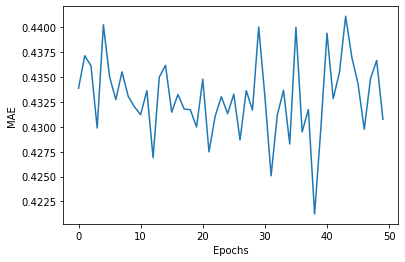

In [179]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.show()

In [181]:
def compression_circuit(data, parameters):
    qc = QuantumCircuit(7,2)
    qc.initialize(data/np.sqrt(np.sum(data**2)),(4,5))
    angle_encoding(qc,data)
    params = add_encoder(qc,len(data))
    qc.h(6)
    qc.cswap(6,4,2)
    qc.cswap(6,5,3)
    qc.h(6)
    qc.measure([2,3],[0,1])
    qc = qc.bind_parameters({params[i]:random_params[i] for i in range(5*n)})
    backend = Aer.get_backend('aer_simulator')
    circ = transpile(qc, backend)
    count = backend.run(circ).result().get_counts()
    return count

In [182]:
compression_counts = compression_circuit(chars, params)
print(compression_counts)

{'01': 184, '11': 548, '10': 132, '00': 160}


In [184]:
arr = [0 for _ in range(n)]
idx = 0
for state, count in compression_counts.items():
    state = state[::-1]
    arr[int(state,2)] = count/1024        
output = ""
for i in range(n):
    output += chr(ord("A")+25-int(round(arr[i]*25,0)))
print(output)

VWVM
